# Problem Statement

***Specific:***
I will build a classification model to predict whether a shipment will reach on time or not for the given shipping dataset. The model will use features such as Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, and Weight_in_gms.

***Measurable:***
Model performance will be assessed using accuracy, precision, recall, and F1 score. The goal is to achieve an accuracy of at least 80% and a precision and recall of at least 70%.

***Achievable:***
The project is appropriately scoped as it involves building a classification model using a dataset with 10,999 entries and a manageable number of features. This scope is neither too aggressive nor too easy.

***Relevant:***
Predicting whether shipments will arrive on time is valuable for logistics companies to improve their service, customer satisfaction, and operational efficiency. The insights can help in identifying factors that contribute to delays and optimizing the shipping process.

***Time-bound:***
The project will be completed within three weeks, including data preprocessing, model development, evaluation, and reporting.


# Capstone Roadmap

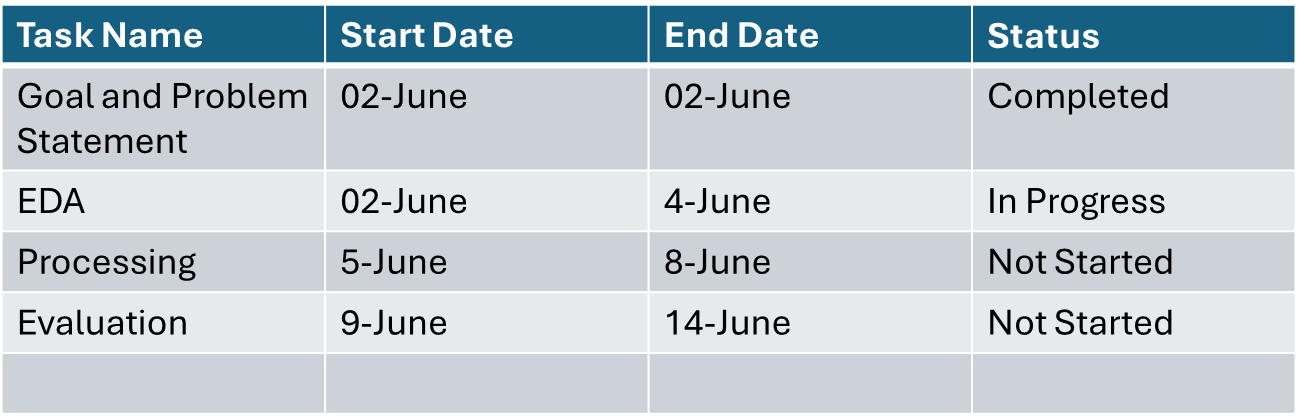

In [4]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [5]:
# Read.
df = pd.read_csv('shipping.csv')

# Examine first five rows.
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**Exploratory Data Analysis**

In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
df.shape

(10999, 12)

In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


<Axes: >

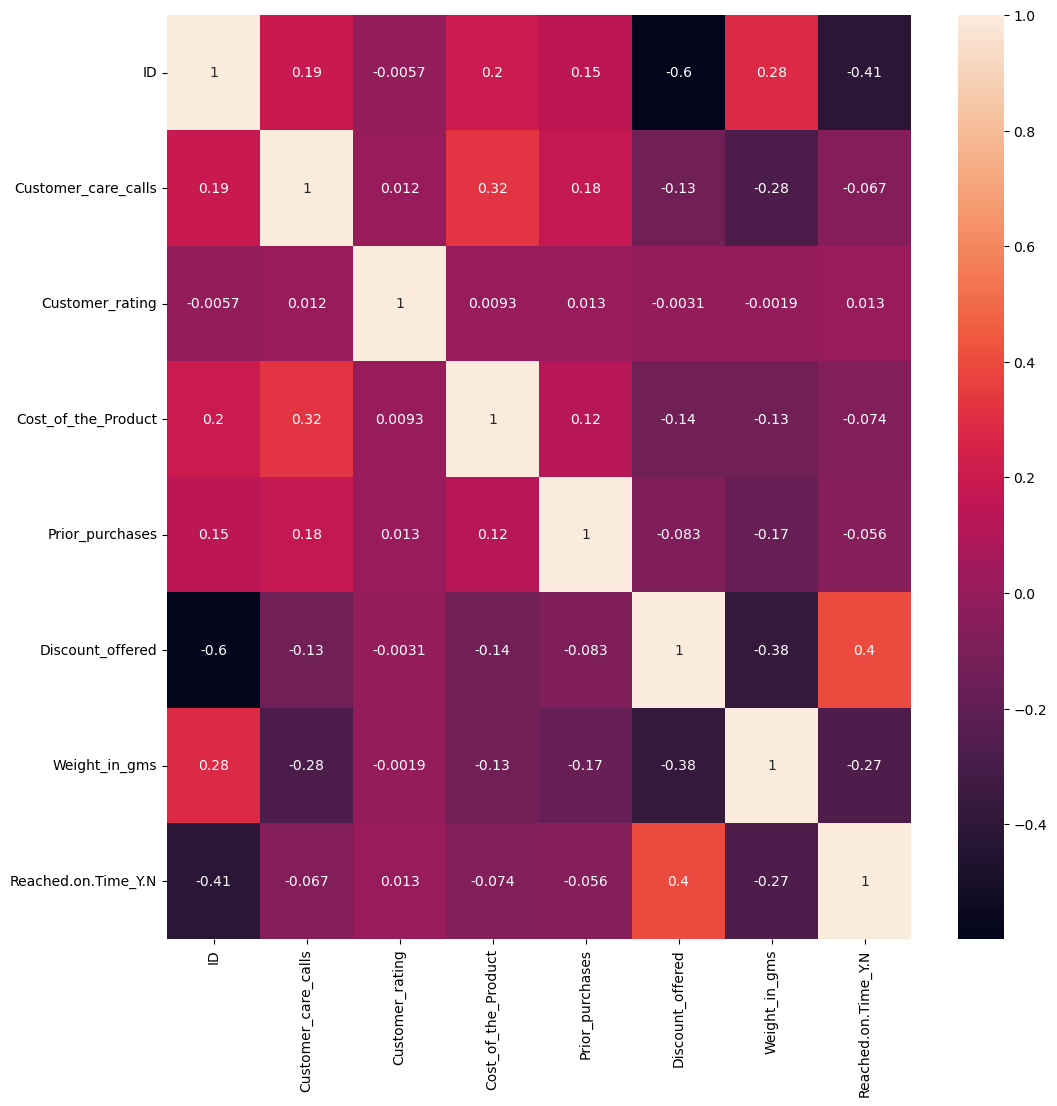

In [10]:
# Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True)